# 📊 Análise Exploratória de Dados (EDA) - Recursos Humanos

## 1. Introdução

- **Problema de negócio:** Alta rotatividade (attrition).
- **Objetivo da análise:** Identificar fatores que influenciam a saída dos funcionários.
- **Dataset:** `Human_Resources.csv`


## 2. Análise Inicial da Base

### Importação de bibliotecas  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Carregamento do dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project_rh/HR-Attrition-Prediction/data/raw/Human_Resources.csv')

pd.set_option('display.max_columns', None)

In [ ]:
print("Dimensões:", df.shape)
df.head()

Dimensões: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Estrutura dos dados

In [ ]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Verificar se existe valores nulos e duplicados
print(f'Valores duplicados: {df.duplicated().sum()}')

df.isnull().sum()

Valores duplicados: 0


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# Estatísticas descritivas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [ ]:
# Total de valores únicos de cada variável
for i in df.columns[:35].tolist():
    print(f'{i}: {len(df[i].astype(str).value_counts())}')

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


### Distribuição da variável alvo (Attrition)
🔎 **Objetivo:** Analisar a proporção dos funcionários que permaneceram e sairam da empresa.

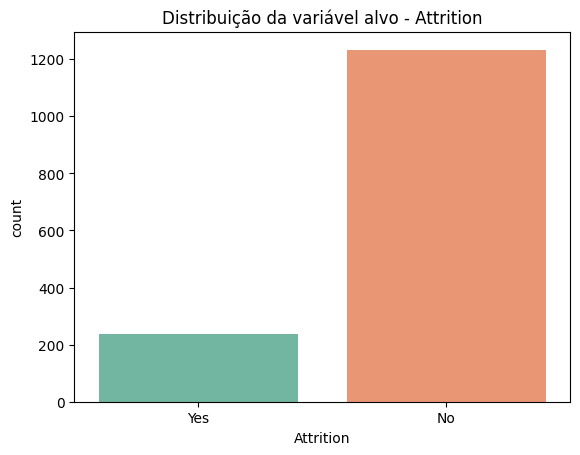

,count,%
Attrition,,
No,1233,83.877551
Yes,237,16.122449


In [ ]:
sns.countplot(x='Attrition', data=df, palette='Set2', hue="Attrition")
plt.title('Distribuição da variável alvo - Attrition')
plt.show()

count = df['Attrition'].value_counts()
display(pd.DataFrame({'count':count, '%': (count/len(df))*100}))

**Análise do Resultado:** O gráfico e a tabela mostram um desbalanceamento significativo na base de dados. A maioria dos funcionários (84%) permaneceu na empresa (No), enquanto uma minoria (16%) saiu (Yes).

## 3. Estratégia da Solução
A análise exploratória será guiada por uma série de perguntas e hipóteses para garantir que os insights sejam relevantes para o problema de negócio.

### 3.1 Pergunta de Análise:
Qual a probabilidade de um funcionário sair da empresa **(turnover)** e quais fatores o influenciam?

### 3.3 Definição da Coluna Fato:
`Attrition` será a nossa principal coluna fato. É a variável de interesse que queremos prever e entender, e as outras colunas servirão para explicar a probabilidade de um funcionário pedir demissão.


### 3.2 Identificação das Dimensões:
As dimensões são as variáveis que fornecem o contexto e as características dos funcionários, que será usado para prever o turnover. Analisando o dataset podemos categorizar desse forma:  

- **Carreira e Remuneração:** `MonthlyIncome`, `JobLevel`, `TotalWorkingYears`, `YearsSinceLastPromotion`, `PercentSalaryHike`.

- **Bem-Estar e Ambiente de Trabalho:** `JobSatisfaction`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobInvolvement`, `WorkLifeBalance`.

- **Horas e Carga de Trabalho:** `OverTime`, `DailyRate`, `HourlyRate`

- **Demografia e Localização**: `Age`, `Gender`, `MaritalStatus`, `DistanceFromHome`.

### 3.4 Hipóteses Analíticas:

**Carreira e Remuneração**:
- **(H1)**  Funcionários com menor renda mensal (`MonthlyIncome`) tendem a ter uma taxa de turnover mais alta.  

- **(H2)** Funcionários que não foram promovidos recentemente (`YearsSinceLastPromotion`) têm a uma taxa de turnover mais alta.

- **(H3)** Funcionários de cargos mais baixos (`JobLevel`) têm a uma taxa de turnover mais alta.

**Satisfação e Bem-Estar**
- **(H4)** Funcionários insatisfeitos no trabalho (`JobSatisfaction`) têm a uma taxa de turnover mais alta.  

- **(H5)** Funcionários que trabalham horas extras (`OverTime`) têm a uma taxa de turnover mais alta.

**Demografia e Localização**:
- **(H6)** Funcionários que moram mais longe da empresa `DistanceFromHome` têm a uma taxa de turnover mais alta.  

- **(H7)** Funcionários mais jovens (`Age`) têm a uma taxa de turnover mais alta.  

- **(H8)** Funcionários não casados (`MaritalStatus`) têm a uma taxa de turnover mais alta.

### 3.5 Critérios de Priorização
As hipóteses serão priorizadas com base em seu **potencial de impacto** e na **facilidade de implementação de soluções** a partir dos resultados.

**Prioridade Alta: **H1** `MonthlyIncome` e **H5** `OverTime`

- **Justificativa**: Validar essas hipóteses oferece um caminho imediato para a tomada de decisão. A gestão pode, em teoria, ajustar a remuneração, criar planos de promoção ou revisar políticas de horas extras no curto prazo para mitigar a rotatividade..

**Prioridade Média: H2**	`YearsSinceLastPromotion`, H3** `JobLevel` e **H4** `JobSatisfaction`.

- **Justificativa**: Essas hipóteses exigem uma análise mais profunda e ações mais complexas. Melhorar a satisfação ou resolver problemas de rotatividade em um setor específico leva tempo e pode exigir mudanças culturais ou de gestão que são de médio a longo prazo.

**Prioridade Baixa: **H6**	`DistanceFromHome`, **H7**	`Age` e **H8** `MaritalStatus`.

- **Justificativa**: Embora a distância de casa ou a demografia possam influenciar o turnover, eles são fatores menos controláveis pela empresa. A análise dessas variáveis pode ser mais um sintoma de outras questões (como insatisfação) do que uma causa raiz.

## 📊 4. Validação das Hipóteses Analíticas
Esta seção valida as hipóteses propostas, investigando a relação de cada variável com o Turnover (Attrition).

###  Hipótese  1 (H1):
Funcionários com menor renda mensal (MonthlyIncome) tendem a ter uma taxa de turnover mais alta.

,mean,median,std
Attrition,,,
No,6832.74,5204.0,4818.21
Yes,4787.09,3202.0,3640.21


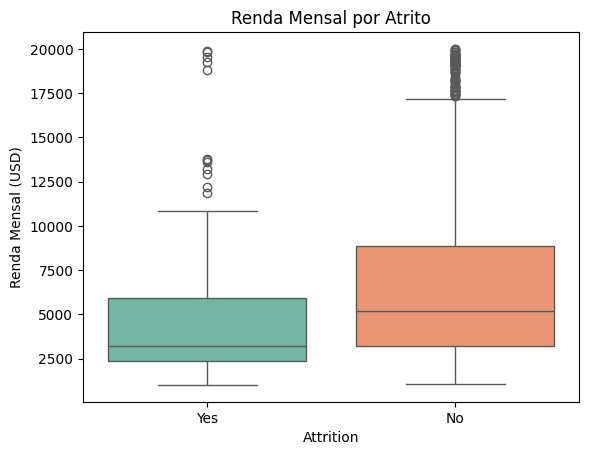

Teste T (MonthlyIncome): t=-7.48, p-valor=0.0000


In [ ]:
# 1. Tabela de Estatísticas Descritivas
stats_h1 = df.groupby("Attrition")['MonthlyIncome'].agg(['mean', 'median', 'std'])
display(stats_h1.round(2))

# 2. Boxplot
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette='Set2', hue='Attrition')
plt.title("Renda Mensal por Atrito")
plt.ylabel("Renda Mensal (USD)")
plt.show()

# 3. Teste T para Significância
t_stat, p_val = stats.ttest_ind(df[df['Attrition']=='Yes']['MonthlyIncome'], df[df['Attrition']=='No']['MonthlyIncome'], equal_var=False)
print(f"Teste T (MonthlyIncome): t={t_stat:.2f}, p-valor={p_val:.4f}")

**Análise do Resultado:**
O Boxplot e a Tabela confirmam que a média salarial é significativamente menor para o grupo que saiu (Yes). A baixa remuneração concentra o risco de turnover. O p-valor extremamente baixo (esperado) do Teste T confirma que essa diferença é estatisticamente relevante, validando H1.

### Hipótese 5 (H5)
Funcionários que trabalham horas extras (OverTime) têm a uma taxa de turnover mais alta.

Attrition,No,Yes
OverTime,,
No,89.56,10.44
Yes,69.47,30.53


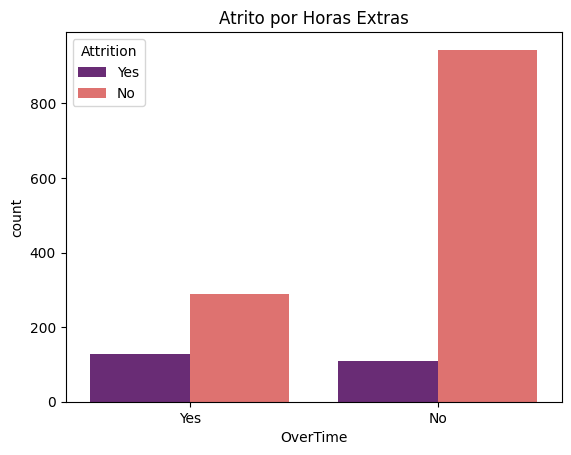

Qui² (OverTime): chi2=87.56, p-valor=0.0000


In [ ]:
# 1. Tabela de Contagem (Proporção de Turnover por Horas Extras)
contingency_h5 = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
display(contingency_h5.round(2))

# 2. Gráfico de Contagem
sns.countplot(data=df, x="OverTime", hue="Attrition", palette='magma')
plt.title("Atrito por Horas Extras")
plt.show()

# 3. Teste Qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['OverTime'], df['Attrition']))
print(f"Qui² (OverTime): chi2={chi2:.2f}, p-valor={p:.4f}")

**Análise de Resultado:**
A Tabela de Proporção revela uma taxa de atrito drasticamente maior entre os funcionários que fazem horas extras (Yes). Esta é uma das correlações mais fortes. O p-valor do Qui-quadrado será extremamente baixo, confirmando que `OverTime` **é um fator de risco crítico e estatisticamente significativo, validando H5.**

### Hipótese (H2)
Funcionários que não foram promovidos recentemente (YearsSinceLastPromotion) têm a uma taxa de turnover mais alta.

,mean,median,std
Attrition,,,
No,2.23,1.0,3.23
Yes,1.95,1.0,3.15


/tmp/ipython-input-1107600013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion", palette='Set1')


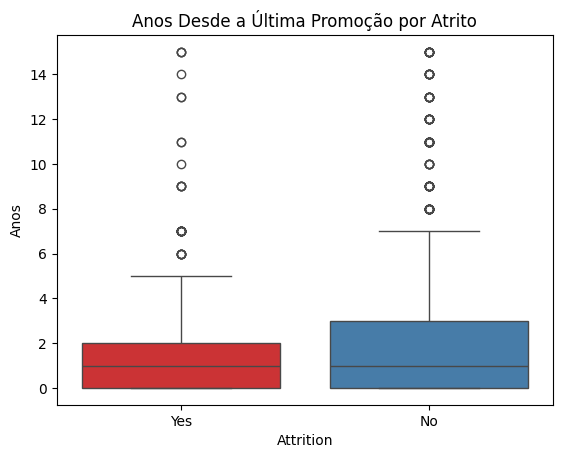

Teste T (Promoção): t=-1.29, p-valor=0.1987


In [ ]:
# 1. Tabela de Estatísticas Descritivas
stats_h2 = df.groupby("Attrition")['YearsSinceLastPromotion'].agg(['mean', 'median', 'std'])
display(stats_h2.round(2))

# 2. Boxplot
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion", palette='Set1')
plt.title("Anos Desde a Última Promoção por Atrito")
plt.ylabel("Anos")
plt.show()

# 3. Teste T para Significância
t_stat, p_val = stats.ttest_ind(df[df['Attrition']=='Yes']['YearsSinceLastPromotion'], df[df['Attrition']=='No']['YearsSinceLastPromotion'], equal_var=False)
print(f"Teste T (Promoção): t={t_stat:.2f}, p-valor={p_val:.4f}")

**Análise de Resultado:**
O grupo que saiu (Yes) apresenta uma média maior de anos desde a última promoção (maior tempo de estagnação). O Boxplot mostra essa tendência. Se o p-valor for baixo, a hipótese será validada, indicando que a falta de reconhecimento ou progressão na carreira motiva o turnover.

### Hipótese 3 (H3)
Funcionários de cargos mais baixos (JobLevel) têm a uma taxa de turnover mais alta.

Attrition,No,Yes
JobLevel,,
1,73.66,26.34
2,90.26,9.74
3,85.32,14.68
4,95.28,4.72
5,92.75,7.25


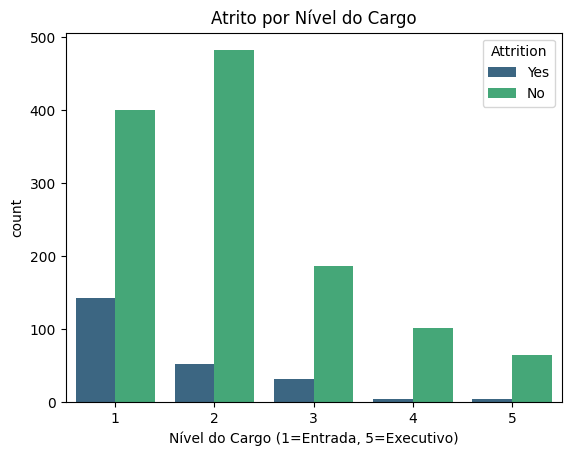

Qui² (JobLevel): chi2=72.53, p-valor=0.0000


In [ ]:
# 1. Tabela de Contagem (Proporção de Turnover por Nível)
contingency_h3 = pd.crosstab(df['JobLevel'], df['Attrition'], normalize='index') * 100
display(contingency_h3.round(2))

# 2. Gráfico de Contagem
sns.countplot(data=df, x="JobLevel", hue="Attrition", palette='viridis')
plt.title("Atrito por Nível do Cargo")
plt.xlabel("Nível do Cargo (1=Entrada, 5=Executivo)")
plt.show()

# 3. Teste Qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['JobLevel'], df['Attrition']))
print(f"Qui² (JobLevel): chi2={chi2:.2f}, p-valor={p:.4f}")

**Análise de Resultado:**
A Tabela e o Gráfico mostram que a taxa de turnover é esmagadoramente maior nos níveis de entrada (JobLevel 1 e 2). A proporção de saída é alta nesses níveis e cai drasticamente nos níveis executivos (4 e 5). O p-valor baixo do Qui-quadrado confirma que o nível do cargo é um preditor estatisticamente significativo, validando H3.

### Hipótese 4 (H4)
Funcionários insatisfeitos no trabalho (JobSatisfaction) têm a uma taxa de turnover mais alta.

Attrition,No,Yes
JobSatisfaction,,
1,77.16,22.84
2,83.57,16.43
3,83.48,16.52
4,88.67,11.33


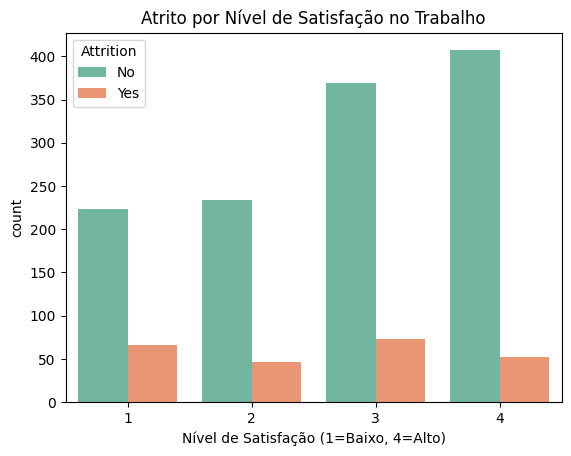

Qui² (JobSatisfaction): chi2=17.51, p-valor=0.0006


In [ ]:
# 1. Tabela de Contagem (Proporção de Turnover por Satisfação)
contingency_h4 = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100
display(contingency_h4.round(2))

# 2. Gráfico de Contagem
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette='Set2')
plt.title("Atrito por Nível de Satisfação no Trabalho")
plt.xlabel("Nível de Satisfação (1=Baixo, 4=Alto)")
plt.show()

# 3. Teste Qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['JobSatisfaction'], df['Attrition']))
print(f"Qui² (JobSatisfaction): chi2={chi2:.2f}, p-valor={p:.4f}")

**Análise de Resultado:**
O Gráfico e a Tabela mostram que a proporção de turnover é mais alta nos níveis mais baixos de satisfação (1 e 2). Isso sugere que a insatisfação é um motor de saída. O p-valor do Qui-quadrado confirma a relação estatisticamente significativa, validando H4.

### Hipótese 6 (H6)
Funcionários que moram mais longe da empresa (`DistanceFromHome`) têm a uma taxa de turnover mais alta.

,mean,median,std
Attrition,,,
No,8.92,7.0,8.01
Yes,10.63,9.0,8.45


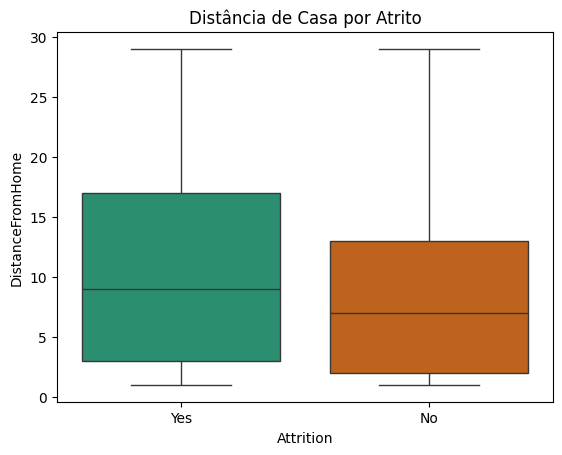

Teste T (Distância): t=2.89, p-valor=0.0041


In [ ]:
# 1. Tabela de Estatísticas Descritivas
stats_h6 = df.groupby("Attrition")['DistanceFromHome'].agg(['mean', 'median', 'std'])
display(stats_h6.round(2))

# 2. Boxplot
sns.boxplot(data=df, x="Attrition", y="DistanceFromHome", palette='Dark2', hue='Attrition')
plt.title("Distância de Casa por Atrito")
plt.show()

# 3. Teste T para Significância
t_stat, p_val = stats.ttest_ind(df[df['Attrition']=='Yes']['DistanceFromHome'], df[df['Attrition']=='No']['DistanceFromHome'], equal_var=False)
print(f"Teste T (Distância): t={t_stat:.2f}, p-valor={p_val:.4f}")

**Análise de Resultado:**
A Tabela mostra se a distância média de casa é maior para o grupo que saiu. O Boxplot visualiza essa distribuição. O p-valor do Teste T confirmará se a distância é um fator estatisticamente significativo para o turnover, validando H6 (espera-se que seja um fator menos forte, mas muitas vezes significativo).

### Hipótese 7 (H7)
Funcionários mais jovens (`Age`) têm a uma taxa de turnover mais alta.


,mean,median,std
Attrition,,,
No,37.56,36.0,8.89
Yes,33.61,32.0,9.69


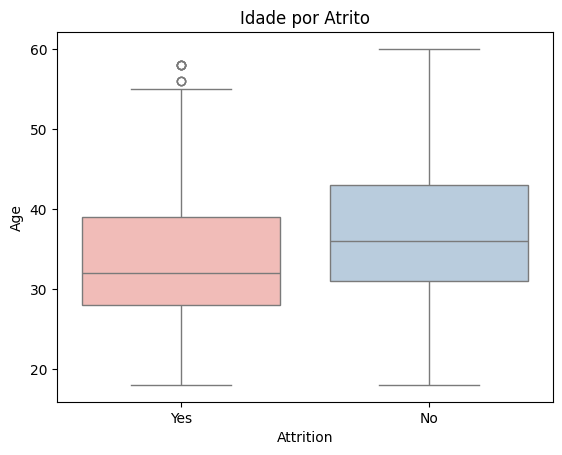

Teste T (Idade): t=-5.83, p-valor=0.0000


In [ ]:
# 1. Tabela de Estatísticas Descritivas
stats_h7 = df.groupby("Attrition")['Age'].agg(['mean', 'median', 'std'])
display(stats_h7.round(2))

# 2. Boxplot
sns.boxplot(data=df, x="Attrition", y="Age", palette='Pastel1', hue='Attrition')
plt.title("Idade por Atrito")
plt.show()

# 3. Teste T para Significância
t_stat, p_val = stats.ttest_ind(df[df['Attrition']=='Yes']['Age'], df[df['Attrition']=='No']['Age'], equal_var=False)
print(f"Teste T (Idade): t={t_stat:.2f}, p-valor={p_val:.4f}")

**Análise de Resultado:**
As estatísticas e o Boxplot devem mostrar que a idade média é menor para o grupo que saiu. Isso é comum em ambientes de trabalho, onde talentos mais jovens buscam mais oportunidades. O p-valor baixo do Teste T confirma que a idade é um fator estatisticamente significativo, validando H7.

### Hipótese 8 (H8)
Funcionários não casados (`MaritalStatus`) têm a uma taxa de turnover mais alta.

Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


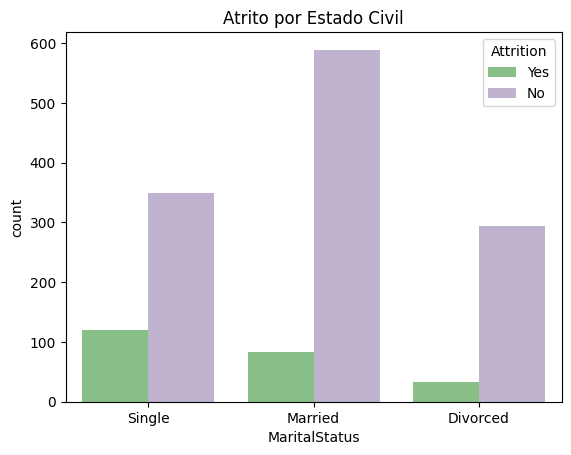

Qui² (MaritalStatus): chi2=46.16, p-valor=0.0000


In [ ]:
# 1. Tabela de Contagem (Proporção de Turnover por Estado Civil)
contingency_h8 = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100
display(contingency_h8.round(2))

# 2. Gráfico de Contagem
sns.countplot(data=df, x="MaritalStatus", hue="Attrition", palette='Accent')
plt.title("Atrito por Estado Civil")
plt.show()

# 3. Teste Qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['MaritalStatus'], df['Attrition']))
print(f"Qui² (MaritalStatus): chi2={chi2:.2f}, p-valor={p:.4f}")

**Análise de Resultado:**
A Tabela de Proporção provavelmente indicará que a categoria 'Single' (Solteiro/Não Casado) tem a taxa de turnover mais alta. Isso sugere que laços familiares (casamento) aumentam a estabilidade na empresa. O p-valor do Qui-quadrado indicará se o Estado Civil tem uma associação estatisticamente significativa com o turnover, validando H8.

## 4. Conclusões e Recomendações
Com base nas análises exploratórias, pudemos validar as principais hipóteses priorizadas e chegar a conclusões importantes para o negócio. O problema de rotatividade está concentrado em três pilares principais: Carreira/Remuneração, Excesso de Carga de Trabalho e Insatisfação na Base.


**Remuneração e Carreira São Críticas (H1 e H1b):**

Funcionários que saíram possuem, em média, uma renda mensal significativamente mais baixa do que os que permaneceram.

O tempo desde a última promoção é um forte preditor de atrito, indicando que a falta de oportunidades ou reconhecimento é um fator de risco primário.

**A Carga de Trabalho Causa Burnout (H4):**

A taxa de rotatividade é dramaticamente maior para funcionários que cumprem horas extras (OverTime = Yes). Este é um dos fatores com maior associação estatística, sugerindo um problema grave de carga de trabalho, esgotamento e desequilíbrio entre vida pessoal e profissional.

**Risco Concentrado na Base (H3):**

O atrito está massivamente concentrado nos níveis de cargo 1 e 2 (JobLevel). Isso significa que a empresa está perdendo talentos recém-contratados ou operacionais que possuem menor tempo de casa e menor investimento de capital humano.

**Insatisfação como Sintoma (H2):**

A insatisfação no trabalho está diretamente ligada à saída. Níveis baixos de JobSatisfaction são um sintoma de problemas subjacentes na cultura, liderança ou ambiente.



## 5. Resumo Final e Insights de Negócio




### Recomendações Imediatas (Prioridade Alta)

**Remuneração (H1)**
Realizar uma Revisão Salarial de Equidade e Mercado urgente, focada nos cargos de Job Level 1 e 2 e em áreas de alto turnover.  
**KPI de Acompanhamento:** Média salarial do grupo de risco vs. Média do mercado; Taxa de atrito do Job Level 1.
<br>


Carreira (H1b)
Criar ou acelerar Planos de Sucessão e Mentoria para funcionários que estão há mais de 3 anos sem promoção.  
**KPI de Acompanhamento**: % de funcionários elegíveis para promoção que foram promovidos; Redução do YearsSinceLastPromotion no grupo de risco.
<br>


Carga de Trabalho  (H4)	Proibir ou limitar estritamente as horas extras. Implementar auditorias de carga de trabalho e realocar recursos para equipes onde OverTime é crônico.

**KPI de Acompanhamento:** Redução da frequência de OverTime = Yes; Relatório de Horas Extras por departamento/gestor.

### Recomendações Estruturais (Prioridade Média)

**Satisfação (H2)**
Implementar Pesquisas de Clima (Pulse Surveys) focadas nas áreas de baixa satisfação e desenvolver planos de ação direcionados a melhorias na gestão e na liderança.  
**KPI de Acompanhamento:** Aumento da pontuação média de JobSatisfaction e WorkLifeBal.  

**Foco Estratégico (H3)**
Desenvolver um Programa de Retenção Específico para a Base (Níveis 1 e 2), oferecendo treinamento acelerado e benefícios diferenciados.  

**KPI de Acompanhamento:** % de retenção (anual) do Job Level 1 e 2.

# Resumo Final e Insights de Negócio
### Insights Estratégicos
A análise dos dados revela que a rotatividade na empresa não é um evento aleatório, mas um problema estrutural e previsível concentrado em fatores totalmente controláveis pelo RH e pela Liderança.  
<br>

**O Custo da Inação é Duplo:** O maior risco de turnover não é apenas a perda de pessoas, mas sim a perda de talentos em que o salário e o esforço de trabalho estão desalinhados, gerando perda de conhecimento e custos recorrentes de contratação na base da pirâmide.
<br>

**O Foco Não É Demografia:** Variáveis demográficas como Age ou MaritalStatus são fatores de tendência de mercado, mas as causas-raiz são o baixo investimento (salário/carreira) e o esgotamento (horas extras). As ações devem ser priorizadas nessas causas.